<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [58]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [59]:
# put your answer here
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [60]:
# put your answer here
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [61]:
# put your answer here
df.shape

(48895, 16)

Identify the numerical features:

In [62]:
# put your answer here
print("+++++++++++ DF INFO +++++++++++")
df.info()

print("+++++++++++ Numerical Features +++++++++++")

print("Numerical Features:")
numerical_features = df.select_dtypes(include=['number']).columns
for feature in numerical_features:
    print(f"- {feature}")


+++++++++++ DF INFO +++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  

Identify the categorical features

Categorical features are columns that contain qualitative data, often representing different groups or categories. In pandas, these are typically stored as `object` (strings) or `category` data types. They are distinct from numerical features and cannot be directly used in mathematical operations without encoding.

In [63]:
# put your answer here
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

Categorical Features:
- name
- host_name
- neighbourhood_group
- neighbourhood
- room_type
- last_review


What are the top 5 questions this dataset might help answer?

In [64]:
# put your answer here

This dataset can help answer a variety of questions, such as:

What is the average price of an Airbnb listing in different neighborhoods or boroughs of NYC? (This can help identify affordable vs. expensive areas).

Which host has the most listings, and what types of rooms do they offer? (Useful for identifying superhosts or larger operators).

What is the distribution of room types (e.g., entire home/apt, private room, shared room) across NYC? (Understanding market segmentation).

Is there a correlation between the number of reviews and the price or availability of a listing? (Insights into popular or in-demand listings).

How does the minimum_nights requirement vary by neighborhood, and how might this impact booking patterns? (Understanding short-term vs. long-term stay preferences).


## B. Structuring

Check if the dataset has proper column types

In [65]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check if the dataset has index issues

In [66]:
# put your answer here

print(f"Is index unique? {df.index.is_unique}")
print(f"Is index monotonic increasing? {df.index.is_monotonic_increasing}")
if not df.index.is_unique or not df.index.is_monotonic_increasing:
    print("Potential index issues detected.")
else:
    print("Index appears to be without issues.")

Is index unique? True
Is index monotonic increasing? True
Index appears to be without issues.


Check if the dataset has duplicated rows

In [67]:
# put your answer here
num_duplicate_rows = df.duplicated().sum()
if num_duplicate_rows > 0:
    print(f"Number of duplicate rows: {num_duplicate_rows}")
    print("You may consider dropping these duplicates if they are not intentional.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


Convert columns to correct types (e.g., dates → datetime).

In [68]:
# put your answer here
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

Identify at least one structural issue and describe how to fix it.

In [69]:
# put your answer here

# Fill missing 'name' values with name: 'Untitled Listing'
df['name'] = df['name'].fillna('Untitled Listing')

# Fill missing 'host_name' values with name: 'Unknown Host'
df['host_name'] = df['host_name'].fillna('Unknown Host')

# Verify that missing values have been handled
print("Missing values after fixing:")
print(df[['name', 'host_name']].isnull().sum())

Missing values after fixing:
name         0
host_name    0
dtype: int64


## C. Cleaning



Check for missing values

In [70]:
# put your answer here

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Check for outliers in `minimum_nights`

Descriptive statistics for 'minimum_nights':


,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


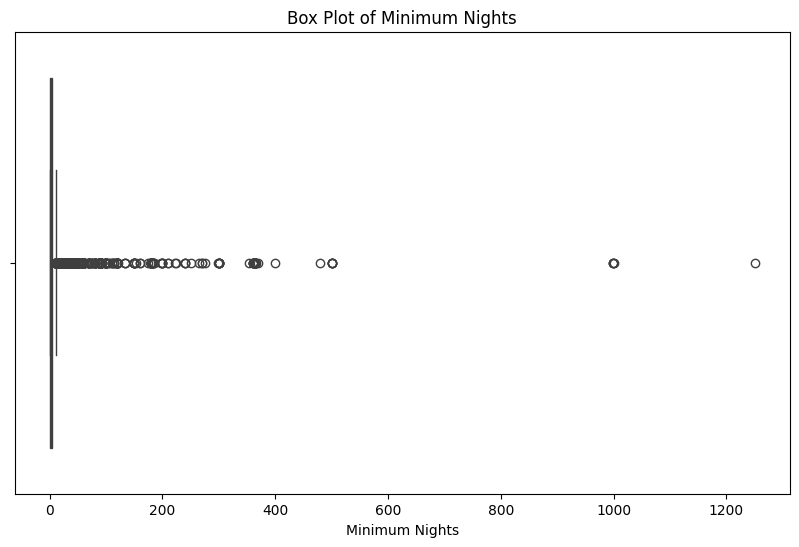

In [71]:
# put your answer here

import matplotlib.pyplot as plt
import seaborn as sns

print("Descriptive statistics for 'minimum_nights':")
display(df['minimum_nights'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()


Check for invalid values (e.g., price ≤ 0)

In [72]:
# put your answer here
invalid_prices = df[df['price'] <= 0]
num_invalid_prices = len(invalid_prices)

if num_invalid_prices > 0:
    print(f"Number of listings with invalid price (price <= 0): {num_invalid_prices}")
    print("Examples of listings with invalid prices:")
    display(invalid_prices.head())
else:
    print("No listings found with invalid price (price <= 0).")

Number of listings with invalid price (price <= 0): 11
Examples of listings with invalid prices:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


Apply a missing-value strategy (drop, fill, or flag)


In [73]:
# put your answer here
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

print("Missing values after filling 'reviews_per_month':")
print(df[['reviews_per_month', 'last_review']].isnull().sum())

Missing values after filling 'reviews_per_month':
reviews_per_month        0
last_review          10052
dtype: int64


Apply an outlier-handling strategy

The 99th percentile for 'minimum_nights' (upper threshold) is: 45.0
Outliers in 'minimum_nights' capped at 45.0.
Descriptive statistics for 'minimum_nights' after capping:


,minimum_nights
count,48895.000000
mean,6.116760
std,9.244957
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,45.000000


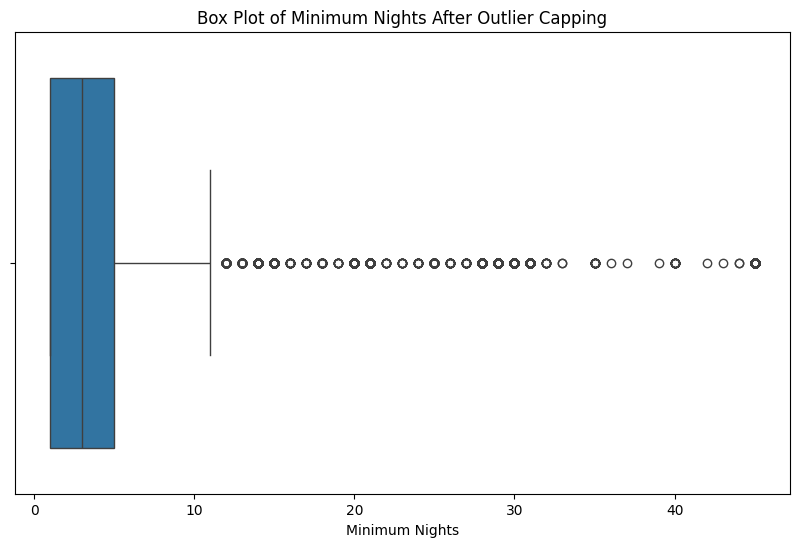

In [74]:
# put your answer here

upper_threshold = df['minimum_nights'].quantile(0.99)
print(f"The 99th percentile for 'minimum_nights' (upper threshold) is: {upper_threshold}")

df['minimum_nights'] = np.where(df['minimum_nights'] > upper_threshold, upper_threshold, df['minimum_nights'])
print(f"Outliers in 'minimum_nights' capped at {upper_threshold}.")

print("Descriptive statistics for 'minimum_nights' after capping:")
display(df['minimum_nights'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Minimum Nights After Outlier Capping')
plt.xlabel('Minimum Nights')
plt.show()

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [75]:
# put your answer here

df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
print("New column 'price_per_minimum_night' created. Displaying the first 5 rows with the new column:")
display(df[['price', 'minimum_nights', 'price_per_minimum_night']].head())

df['review_rate_per_month'] = df['reviews_per_month']
print("New column 'review_rate_per_month' created. Displaying the first 5 rows with the new column:")
display(df[['reviews_per_month', 'review_rate_per_month']].head())

price_threshold = df['price'].quantile(0.75)
df['is_expensive'] = df['price'] > price_threshold
print(f"The 75th percentile price threshold is: {price_threshold:.2f}")
print("New column 'is_expensive' created. Displaying the first 5 rows with the new column:")
display(df[['price', 'is_expensive']].head())

print("DataFrame information after adding new columns:")
df.info()

New column 'price_per_minimum_night' created. Displaying the first 5 rows with the new column:


,price,minimum_nights,price_per_minimum_night
0,149,1.0,149.0
1,225,1.0,225.0
2,150,3.0,50.0
3,89,1.0,89.0
4,80,10.0,8.0


New column 'review_rate_per_month' created. Displaying the first 5 rows with the new column:


,reviews_per_month,review_rate_per_month
0,0.21,0.21
1,0.38,0.38
2,0.00,0.00
3,4.64,4.64
4,0.10,0.10


The 75th percentile price threshold is: 175.00
New column 'is_expensive' created. Displaying the first 5 rows with the new column:


,price,is_expensive
0,149,False
1,225,True
2,150,False
3,89,False
4,80,False


DataFrame information after adding new columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights        

Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [76]:
# put your answer here
aggregated_summary = df.groupby('neighbourhood_group').agg(
    average_price=('price', 'mean'),
    average_minimum_nights=('minimum_nights', 'mean'),
    total_listings=('id', 'count')
).reset_index()

print("Aggregated Summary Table (Average Price and Minimum Nights per Neighbourhood Group):")
display(aggregated_summary)

Aggregated Summary Table (Average Price and Minimum Nights per Neighbourhood Group):


,neighbourhood_group,average_price,average_minimum_nights,total_listings
0,Bronx,87.496792,3.722273,1091
1,Brooklyn,124.383207,5.323916,20104
2,Manhattan,196.875814,7.379438,21661
3,Queens,99.517649,4.704906,5666
4,Staten Island,114.812332,3.973190,373


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [77]:
# put your answer here
# Create validation checks

validation_results={}

# Check 1: Price must be positive

if 'price' in df.columns:

  invalid_price=(df['price']<=0).sum()

  validation_results['Price must be positive']=invalid_price

# Check 2: Host ID should not be null

if 'host_id' in df.columns:

  null_host_id=df['host_id'].isnull().sum()

  validation_results['Host ID should not be null']=null_host_id

# Check 3: Minimum nights must be >= 1

if 'minimum_nights' in df.columns:

  invalid_min_nights=(df['minimum_nights']<1).sum()

  validation_results['Minimum nights must be >= 1']=invalid_min_nights

# Generate validation report

validation_report=pd.DataFrame({

  'Validation Rule':list(validation_results.keys()),

  'Violations':list(validation_results.values())

})

validation_report['Status'] = validation_report['Violations'].apply(

  lambda x: 'PASS' if x == 0 else 'FAIL'

)

print("Validation Report:")

print(validation_report)

print(f"\nTotal rows in dataset: {len(df)}")

print(f"\nDecision: {'Dataset is valid' if validation_report['Violations'].sum() == 0 else 'Some rows need to be removed or corrected'}")

# Remove invalid rows if any

if validation_report['Violations'].sum() > 0:

  print("\nRemoving invalid rows...")

  if 'price' in df.columns:

    df = df[df['price'] > 0]

  if 'host_id' in df.columns:

    df = df[df['host_id'].notna()]

  if 'minimum_nights' in df.columns:

    df = df[df['minimum_nights'] >= 1]

print(f"Rows after removal: {len(df)}")

validation_report

Validation Report:
               Validation Rule  Violations Status
0       Price must be positive          11   FAIL
1   Host ID should not be null           0   PASS
2  Minimum nights must be >= 1           0   PASS

Total rows in dataset: 48895

Decision: Some rows need to be removed or corrected

Removing invalid rows...
Rows after removal: 48884


,Validation Rule,Violations,Status
0,Price must be positive,11,FAIL
1,Host ID should not be null,0,PASS
2,Minimum nights must be >= 1,0,PASS


## F. Publishing

Select final columns for publication.



In [78]:
# put your answer here
final_columns = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
    'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
    'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price_per_minimum_night', 'is_expensive'
]

df_published = df[final_columns].copy()

print("Selected columns for publication. Displaying first 5 rows:")
display(df_published.head())

print("\nInformation about the published DataFrame:")
df_published.info()

Selected columns for publication. Displaying first 5 rows:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,2018-10-19,0.21,6,365,149.0,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45,2019-05-21,0.38,2,355,225.0,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0,NaT,0.00,1,365,50.0,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,270,2019-07-05,4.64,1,194,89.0,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9,2018-11-19,0.10,1,0,8.0,False



Information about the published DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48884 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   host_name                       48884 non-null  object        
 4   neighbourhood_group             48884 non-null  object        
 5   neighbourhood                   48884 non-null  object        
 6   latitude                        48884 non-null  float64       
 7   longitude                       48884 non-null  float64       
 8   room_type                       48884 non-null  object        
 9   price                           48884 non-null  int64         
 10  minimum_nights                 

Export cleaned dataset:

In [79]:
# put your answer here
df_published.to_csv('cleaned_airbnb.csv', index=False)
print("Cleaned dataset exported to 'cleaned_airbnb.csv'")

Cleaned dataset exported to 'cleaned_airbnb.csv'


Export summary reports (e.g., validation or aggregations) as CSV.

In [80]:
# put your answer here

# Export the aggregated summary table
aggregated_summary.to_csv('aggregated_summary.csv', index=False)
print("Aggregated summary exported to 'aggregated_summary.csv'")

# Export the validation report
validation_report.to_csv('validation_report.csv', index=False)
print("Validation report exported to 'validation_report.csv'")

Aggregated summary exported to 'aggregated_summary.csv'
Validation report exported to 'validation_report.csv'
